<a href="https://colab.research.google.com/github/brianshin12/19-lab/blob/master/2layer_of_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:

    %tensorflow_version 2.x  # %tensorflow_version only exists in Colab

except Exception:

    pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [0]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w>2]

np.random.seed(42)
random_index = np.random.permutation(25000)
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [0]:
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [10]:
model_lstm = Sequential()

model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8, return_sequences = True))
model_lstm.add(LSTM(4))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 8)           1312      
_________________________________________________________________
lstm_3 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 33,525
Trainable params: 33,525
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 747us/sample - loss: 0.4740 - accuracy: 0.7849 - val_loss: 0.3948 - val_accuracy: 0.8326
Epoch 2/10
20000/20000 [==============================] - 10s 514us/sample - loss: 0.3493 - accuracy: 0.8561 - val_loss: 0.3594 - val_accuracy: 0.8470
Epoch 3/10
20000/20000 [==============================] - 10s 508us/sample - loss: 0.3185 - accuracy: 0.8689 - val_loss: 0.3684 - val_accuracy: 0.8352
Epoch 4/10
20000/20000 [==============================] - 10s 502us/sample - loss: 0.3000 - accuracy: 0.8750 - val_loss: 0.3664 - val_accuracy: 0.8438
Epoch 5/10
20000/20000 [==============================] - 10s 502us/sample - loss: 0.2852 - accuracy: 0.8813 - val_loss: 0.3587 - val_accuracy: 0.8462
Epoch 6/10
20000/20000 [==============================] - 10s 505us/sample - loss: 0.2728 - accuracy: 0.8860 - val_loss: 0.3763 - val_accuracy: 0.8386
Epoch 7/10
20000/20000 [=====================

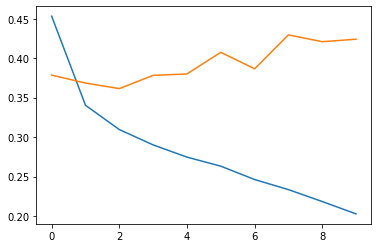

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

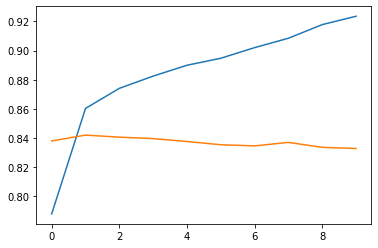

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()